In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

%config InlineBackend.figure_format = 'retina'

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import sys
sys.path.append('/Users/patchong/Google Drive/Work/Prep/Challenges/Opendoor')

In [4]:
df = pd.read_csv('development_df.csv')

In [5]:
df.head()

,flip_token,back_yard_condition,basement_unfinished_sq_ft,bathroom_condition,bathroom_features,bathrooms_full,bathrooms_half,bedrooms,eligibility_features,exterior_stories,floor_condition,floor_type,front_yard_condition,garage_spaces,has_renovation,kitchen_appliance_type,kitchen_condition,kitchen_countertop,kitchen_features,paint_condition,pool,primary_floor_condition,primary_floor_type,renovation_amount,secondary_floor_condition,secondary_floor_type,total_finished_sq_ft,basement_finished_sq_ft,sq_ft,valuation_date,above_grade_sq_ft,age,f_days_since_prev_close,market_name,bathrooms,pool_above_ground,hvac_age,roof_age,in_gated_community,common_scope
0,Z9FJAA5RXGXC,partially_landscaped,0.0,great_condition,"['double_sink', 'separate_shower_tub']",2.0,1.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,black,typical_use,formica,"['kitchen_island', 'tile_backsplash']",typical_use,0.0,typical_use,carpet,0,typical_use,carpet,2277.0,0.0,2290.0,2027-05-31 23:35:49.295526,2277.0,12.0,4380.0,atlantis,NaN,NaN,8_to_15_years,8_to_15_years,False,3554.43
1,7W5Y1WKECD261,fully_landscaped,NaN,great_condition,"['granite_countertops', 'tile_surround', 'updated_tile_floors']",2.0,0.0,3.0,['_none_'],1.0,NaN,NaN,fully_landscaped,2.0,False,black,great_condition,granite_slab,"['kitchen_island', 'new_cabinets', 'tile_backsplash']",great_condition,0.0,great_condition,tile,0,great_condition,carpet,1411.0,0.0,1411.0,2027-05-31 23:25:03.321129,1411.0,59.0,21535.0,asgard,NaN,NaN,0_to_7_years,8_to_15_years,False,8841.98
2,54G38FDCPNMFT,needs_work,NaN,typical_use,"['double_sink', 'separate_shower_tub']",2.0,0.0,3.0,['_none_'],1.0,NaN,NaN,fully_landscaped,2.0,False,stainless_steel,great_condition,granite_slab,"['_none_', 'stainless_steel_appliances']",great_condition,0.0,great_condition,carpet,0,great_condition,carpet,1916.0,0.0,1916.0,2027-05-31 22:00:11.689445,1916.0,16.0,458.0,asgard,NaN,NaN,16_plus_years,16_plus_years,False,1086.30
3,4Q7NJTMZDVH0M,fully_landscaped,NaN,typical_use,"['double_sink', 'separate_shower_tub', 'tile_surround', 'updated_tile_floors']",2.0,1.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,mixed,typical_use,formica,['tile_backsplash'],typical_use,0.0,typical_use,tile,0,typical_use,carpet,2900.0,0.0,2900.0,2027-05-31 21:08:41.147442,2900.0,20.0,5190.0,kamar_taj,NaN,NaN,16_plus_years,16_plus_years,False,1934.75
4,KZV20HJ3VCPP,partially_landscaped,NaN,typical_use,"['double_sink', 'granite_countertops', 'updated_tile_floors']",2.0,0.0,4.0,['_none_'],1.0,NaN,NaN,fully_landscaped,0.0,False,stainless_steel,typical_use,granite_slab,"['kitchen_island', 'stainless_steel_appliances', 'tile_backsplash']",typical_use,0.0,great_condition,tile,0,great_condition,tile,1756.0,0.0,1756.0,2027-05-31 20:38:26.396175,1756.0,51.0,1109.0,asgard,NaN,NaN,0_to_7_years,0_to_7_years,False,3692.00


# Data Cleaning & Feature Engineering

In [6]:
print('Shape: {0}'.format(df.shape))
print('Avg Repair Price: {0}'.format(df.common_scope.mean()))

Shape: (10919, 40)
Avg Repair Price: 7042.446612327127


In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,basement_unfinished_sq_ft,bathrooms_full,bathrooms_half,bedrooms,exterior_stories,garage_spaces,pool,renovation_amount,total_finished_sq_ft,basement_finished_sq_ft,sq_ft,above_grade_sq_ft,age,f_days_since_prev_close,bathrooms,pool_above_ground,common_scope
count,3884.000000,10804.000000,10917.000000,10918.000000,10910.000000,10917.000000,10919.000000,10919.000000,10919.000000,10897.000000,10913.000000,10919.000000,10919.000000,10919.000000,6071.000000,6071.000000,10919.000000
mean,54.570803,2.125231,0.467070,3.363528,1.550321,1.748374,0.095979,20553.622127,1948.918033,25.473525,1935.089893,1924.717740,21.691181,4510.918857,2.199078,0.002471,7042.446612
std,244.149731,0.445031,0.520152,0.726509,0.532204,0.720949,0.294577,240142.760396,622.051402,160.317390,606.969342,599.913890,12.695962,3982.873600,0.454826,0.049649,6191.373641
min,-564.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,500.000000,1.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1496.000000,0.000000,1493.000000,1485.000000,13.000000,1707.500000,2.000000,0.000000,2402.855000
50%,0.000000,2.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1840.000000,0.000000,1832.000000,1822.000000,18.000000,3379.000000,2.100000,0.000000,5516.570000
75%,0.000000,2.000000,1.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2299.500000,0.000000,2282.000000,2272.000000,31.000000,5575.500000,2.100000,0.000000,9750.500000
max,2208.000000,5.000000,5.000000,7.000000,3.000000,4.000000,1.000000,7000000.000000,5953.000000,2524.000000,5210.000000,5210.000000,78.000000,21535.000000,5.500000,1.000000,95460.210000


Before plotting, let's first clean up some of the features (i.e. dealing with NaNs, missing values, duplicated features, etc).

In [8]:
df.isna().sum()

flip_token                       0
back_yard_condition             10
basement_unfinished_sq_ft     7035
bathroom_condition               7
bathroom_features               64
bathrooms_full                 115
bathrooms_half                   2
bedrooms                         1
eligibility_features            35
exterior_stories                 9
floor_condition              10698
floor_type                   10697
front_yard_condition             0
garage_spaces                    2
has_renovation                   0
kitchen_appliance_type          69
kitchen_condition                7
kitchen_countertop              10
kitchen_features                67
paint_condition                 19
pool                             0
primary_floor_condition        376
primary_floor_type              60
renovation_amount                0
secondary_floor_condition      256
secondary_floor_type            60
total_finished_sq_ft             0
basement_finished_sq_ft         22
sq_ft               

For the features below, fill NaN's using heuristics (i.e. make a reasonable guess based on knowledge of the underlying domain). If a feature has a large proportion of NaN's, the feature is not included in the model.

The remainder of features will need further analysis.

In [9]:
df.back_yard_condition = df.back_yard_condition.fillna("no_yard")
df.bathroom_condition = df.bathroom_condition.fillna("typical_use")
df.bathroom_features = df.bathroom_features.fillna('0')
df.bathrooms_full = df.bathrooms_full.fillna(round(df.bathrooms_full.mean()))
df.bathrooms_half = df.bathrooms_half.fillna(round(df.bathrooms_half.mean()))
df.bedrooms = df.bedrooms.fillna(round(df.bedrooms.mean())) # round() for plots and interpretation
df.eligibility_features = df.eligibility_features.fillna('0')
df.exterior_stories = df.exterior_stories.fillna(1.0)
df.garage_spaces = df.garage_spaces.fillna(0.0)
df.hvac_age = df.hvac_age.fillna("8_to_15_years")
df.kitchen_appliance_type = df.kitchen_appliance_type.fillna("other")
df.kitchen_condition = df.kitchen_condition.fillna("typical_condition")
df.kitchen_countertop = df.kitchen_countertop.fillna("other")
df.kitchen_features = df.kitchen_features.fillna('0')
df.paint_condition = df.paint_condition.fillna("typical_use")
df.roof_age = df.roof_age.fillna("8_to_15_years")
df.primary_floor_condition = df.primary_floor_condition.fillna("typical_use")
df.primary_floor_type = df.primary_floor_type.fillna("other")
df.secondary_floor_condition = df.secondary_floor_condition.fillna("typical_use")
df.secondary_floor_type = df.secondary_floor_type.fillna("other")
df.sq_ft = df.sq_ft.fillna(df.sq_ft.mean())

Let's plot the features and see if we can find anything interesting...

In [10]:
# Bin continuous features for plotting and fix any labels.

df['age_grouped'] = df.age.apply(lambda x: '< 10' if x < 10 else ('< 20' if x < 20 else 
                                          ('< 30' if x < 30 else ('< 40' if x < 40 else 
                                          ('< 50' if x < 50 else ('< 60' if x < 60 else '> 60'))))))

df['f_days_since_prev_close_grouped'] = df.f_days_since_prev_close.apply(lambda x: '< 5yr' if x < 1825 else
                                                                                  ('< 25yr' if x < 9125 else
                                                                                  ('< 50yr' if x < 18250 else '>= 50yr')))

# We replace 'not sure' with the average age for two reasons:
#  (1) regression to the mean
#  (2) we can label encode the features since they are ordinal
df['hvac_age'] = df.hvac_age.apply(lambda x: '8_to_15_years' if x == 'not_sure' else x)
df['roof_age'] = df.roof_age.apply(lambda x: '8_to_15_years' if x == 'not_sure' else x)

df['kitchen_condition'] = df.kitchen_condition.apply(lambda x: 'typical_condition' if x == "typical_use" else x)
df['kitchen_countertop'] = df.kitchen_countertop.apply(lambda x: 'granite' if 'granite' in x else ('granite' if x == 'solid_stone_slab' else ('other' if 'other' in x else x)))

df['in_gated_community'] = df.in_gated_community.apply(lambda x: 1 if x == True else 0)

In [11]:
# Some work is required to plot and model the variables where there's a list of "features"

dict_of_kfeatures = {}
dict_of_bfeatures = {}
dict_of_efeatures = {}

for row in range(len(df)):
    if df.loc[row, 'kitchen_features'] == 0 or \
       df.loc[row, 'bathroom_features'] == 0 or \
       df.loc[row, 'eligibility_features'] == 0 : 
        continue
            
    kf = list(df.loc[row, 'kitchen_features'].split("'"))
    bf = list(df.loc[row, 'bathroom_features'].split("'"))
    ef = list(df.loc[row, 'eligibility_features'].split("'"))
    
    for feature in kf:
        if feature not in dict_of_kfeatures:
            dict_of_kfeatures[feature] = 1
        else:
            dict_of_kfeatures[feature] += 1
    
    for feature in bf:
        if feature not in dict_of_bfeatures:
            dict_of_bfeatures[feature] = 1
        else:
            dict_of_bfeatures[feature] += 1
            
    for feature in ef:
        if feature not in dict_of_efeatures:
            dict_of_efeatures[feature] = 1
        else:
            dict_of_efeatures[feature] += 1
            
del dict_of_kfeatures["_none_"]
del dict_of_kfeatures["0"]
del dict_of_kfeatures[", "]
del dict_of_kfeatures["]"]
del dict_of_kfeatures["["]
del dict_of_kfeatures["[]"]
del dict_of_bfeatures["_none_"]
del dict_of_bfeatures["0"]
del dict_of_bfeatures[", "]
del dict_of_bfeatures["]"]
del dict_of_bfeatures["["]
del dict_of_bfeatures["[]"]
del dict_of_efeatures["_none_"]
del dict_of_efeatures["0"]
del dict_of_efeatures[", "]
del dict_of_efeatures["]"]
del dict_of_efeatures["["]
del dict_of_efeatures["[]"]

In [12]:
# For plotting...
kf_data = {'kitchen_feature':
               ['kitchen_island', 'tile_backsplash', 'new_cabinets'],
           'common_scope_mean':
               [df[df['kitchen_features'].str.contains('kitchen_island')].common_scope.mean(),
                df[df['kitchen_features'].str.contains('tile_backsplash')].common_scope.mean(),
                df[df['kitchen_features'].str.contains('new_cabinets')].common_scope.mean()]}
kf_df = pd.DataFrame(data=kf_data)

bf_data = {'bathroom_feature':
               ['double_sink', 'shower_tub', 'granite_countertops', 'tile_surround', 'updated_tile_floors'],
           'common_scope_mean':
               [df[df['bathroom_features'].str.contains('double_sink')].common_scope.mean(),
                df[df['bathroom_features'].str.contains('shower_tub')].common_scope.mean(),
                df[df['bathroom_features'].str.contains('granite_countertops')].common_scope.mean(),
                df[df['bathroom_features'].str.contains('tile_surround')].common_scope.mean(),
                df[df['bathroom_features'].str.contains('updated_tile_floors')].common_scope.mean()]}
bf_df = pd.DataFrame(data=bf_data)

ef_data = {'eligibility_feature':
               ['solar', 'addition', 'has_foundation_issues'],
           'common_scope_mean':
               [df[df['eligibility_features'].str.contains('solar')].common_scope.mean(),
                df[df['eligibility_features'].str.contains('addition')].common_scope.mean(),
                df[df['eligibility_features'].str.contains('foundation')].common_scope.mean()]}
ef_df = pd.DataFrame(data=ef_data)

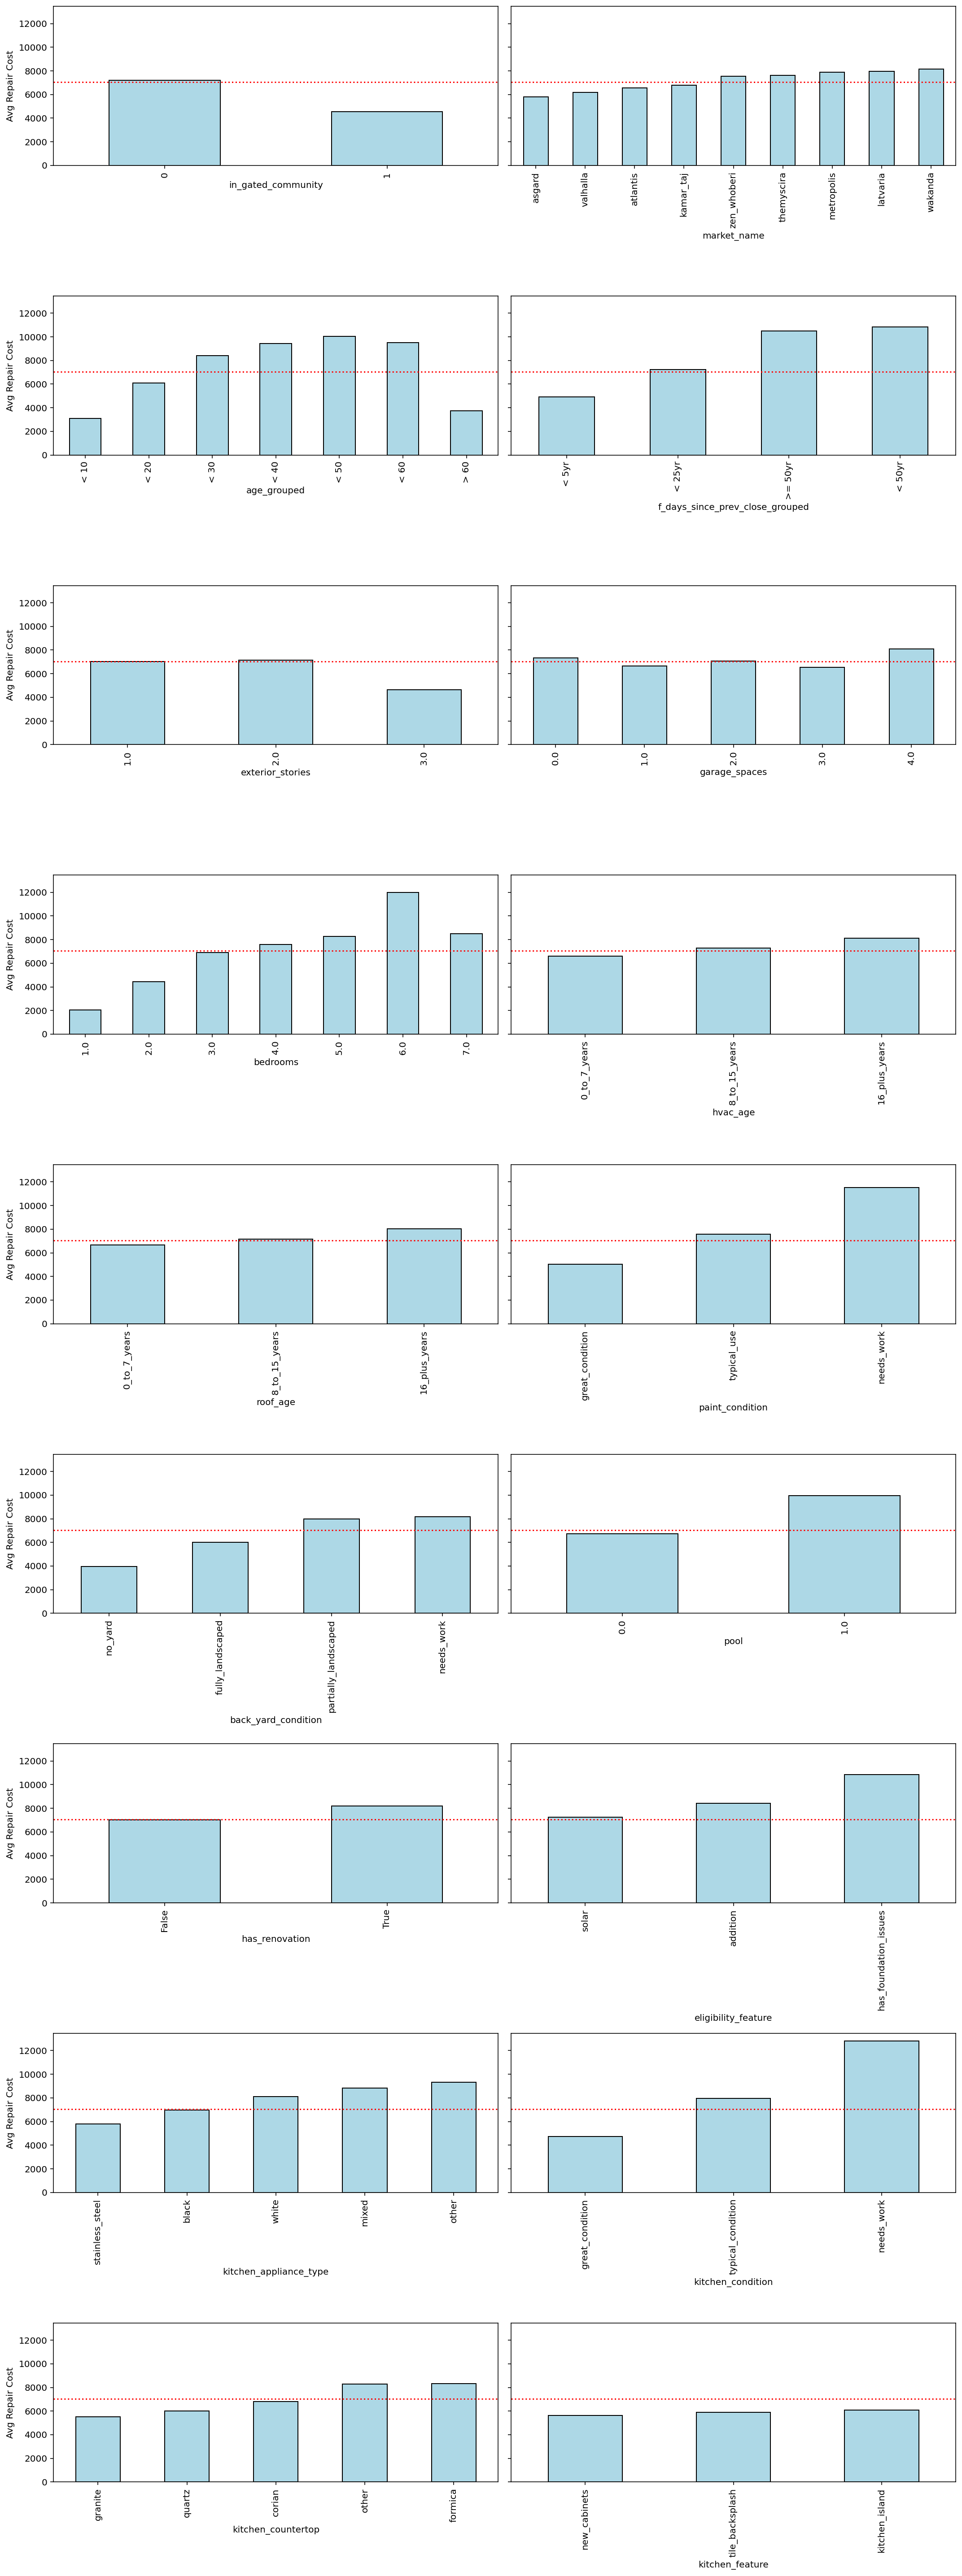

In [13]:
fig, ax = plt.subplots(9,2, figsize = (15,40), sharey = True)

for i in range(18):
    ax.ravel()[i].axhline(df.common_scope.mean(), color = 'r', ls = ':')
    ax.ravel()[i].set_ylabel('Avg Repair Cost')
    ax.ravel()[i].set_yticks(np.arange(0, 16000, 2000))  

df.groupby('in_gated_community').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[0])
df.groupby('market_name').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[1])
df.groupby('age_grouped').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[2])
df.groupby('f_days_since_prev_close_grouped').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[3])
df.groupby('exterior_stories').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[4])
df.groupby('garage_spaces').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[5])
df.groupby('bedrooms').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[6])
df.groupby('hvac_age').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[7])
df.groupby('roof_age').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[8])
df.groupby('paint_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[9])
df.groupby('back_yard_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[10])
df.groupby('pool').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[11])
df.groupby('has_renovation').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[12])
ef_df.groupby('eligibility_feature').common_scope_mean.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[13])
df.groupby('kitchen_appliance_type').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[14])
df.groupby('kitchen_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[15])
df.groupby('kitchen_countertop').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[16])
kf_df.groupby('kitchen_feature').common_scope_mean.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[17])

fig.tight_layout()

**Note:** One interesting fact is that if a home has had a renovation, the average repair cost is higher. One would expect the opposite. Possible reasons could be due to multicollinearity or interaction between features.

Otherwise, there are no surprises. Features that (likely) have a larger influence include the age of the home, the paint condition and kitchen features. This makes sense since these renovations have the greatest increase in home value, so it stands to reason if these things are in good condition, less renovations will be required.

Let's first unpack _kitchen_features_, _bathroom_features_, and _eligibility_features_ into unique features.

Although some features seem like a good signal for predicting _common_scope_, if it's only present in ~1% of the data, they won't be influential.

We're also using heuristics to determine if a "feature" should be included.

Together, these two strategies should result in an ideal feature set.

In [14]:
dict_of_kfeatures

{'kitchen_island': 3711,
 'tile_backsplash': 3828,
 'new_cabinets': 1543,
 'stainless_steel_appliances': 4704,
 'double_ovens': 170}

In [15]:
df['has_new_cabinets'] = 0
df['has_tile_backsplash'] = 0
df['has_kitchen_island'] = 0

for row in range(len(df)):
    if 'new_cabinets' in df.loc[row, 'kitchen_features']:
        df.loc[row, 'has_new_cabinets'] = 1
    if 'tile_backsplash' in df.loc[row, 'kitchen_features']:
        df.loc[row, 'has_tile_backsplash'] = 1
    if 'kitchen_island' in df.loc[row, 'kitchen_features']:
        df.loc[row, 'has_kitchen_island'] = 1

In [16]:
dict_of_bfeatures

{'double_sink': 6869,
 'separate_shower_tub': 5591,
 'granite_countertops': 2176,
 'tile_surround': 4204,
 'updated_tile_floors': 3548,
 'custom_tub_shower': 18}

In [17]:
df['has_double_sink'] = 0
df['has_sep_shower_tub'] = 0
df['has_granite_countertops'] = 0
df['has_tile_surround'] = 0
df['has_updated_tile_floors'] = 0

for row in range(len(df)):
    if 'double_sink' in df.loc[row, 'bathroom_features']:
        df.loc[row, 'has_double_sink'] = 1
    if 'shower_tub' in df.loc[row, 'bathroom_features']:
        df.loc[row, 'has_sep_shower_tub'] = 1
    if 'granite_countertops' in df.loc[row, 'bathroom_features']:
        df.loc[row, 'has_granite_countertops'] = 1
    if 'tile_surround' in df.loc[row, 'bathroom_features']:
        df.loc[row, 'has_tile_surround'] = 1
    if 'updated_tile_floors' in df.loc[row, 'bathroom_features']:
        df.loc[row, 'has_updated_tile_floors'] = 1

In [18]:
dict_of_efeatures

{'gated_community': 517,
 'owned_solar_panels': 137,
 'solar_panels': 171,
 'leased_solar_panels': 42,
 'permitted_addition': 533,
 'known_foundation_issues': 148,
 'septic': 2,
 'flood_history': 1,
 'age_restricted_community': 33,
 'history_of_chemical_contamination': 3,
 'unpermitted_addition': 2}

The features worth exploring include:

- solar panels
- additions
- _known_foundation_issues_

In [19]:
df['has_solar_panels'] = 0
df['has_addition'] = 0
df['has_foundation_issues'] = 0

for row in range(len(df)):
    if 'solar' in df.loc[row, 'eligibility_features']:
        df.loc[row, 'has_solar_panels'] = 1
    if 'addition' in df.loc[row, 'eligibility_features']:
        df.loc[row, 'has_addition'] = 1
    if 'foundation' in df.loc[row, 'eligibility_features']:
        df.loc[row, 'has_foundation_issues'] = 1

Now, let's focus on the features pertaining to square footage.

- _basement_unfinished_sq_ft_
- _basement_finished_sq_ft_
- _total_finished_sq_ft_
- _above_grade_sq_ft_
- _sq_ft_ 

In [20]:
print(df.basement_unfinished_sq_ft.isna().sum())
print(df.basement_unfinished_sq_ft.value_counts().head())
print(df.basement_finished_sq_ft.value_counts().head())

7035
0.0       3652
600.0        3
850.0        3
624.0        3
1300.0       3
Name: basement_unfinished_sq_ft, dtype: int64
0.0      10564
600.0        8
200.0        8
500.0        6
700.0        6
Name: basement_finished_sq_ft, dtype: int64


98% of _basement_unfinished_sq_ft_ is either NaN (65%) or 0 (33%). It's unknown if NaN implies the home doesn't have a basement or has a finished basement. It's best to not include the feature.

Similarly, 97% _basement_finished_sq_ft_ is 0, so it won't provide much signal.

The remaining square footage features look the same. Let's investigate them.

- _total_finished_sq_ft_
- _above_grade_sq_ft_
- _sq_ft_ 

    sq_ft                 group
0  2277.0  total_finished_sq_ft
1  1411.0  total_finished_sq_ft
2  1916.0  total_finished_sq_ft
3  2900.0  total_finished_sq_ft
4  1756.0  total_finished_sq_ft


                sum_sq       df         F    PR(>F)
group     3.219115e+06      2.0  4.330438  0.013169
Residual  1.217416e+10  32754.0       NaN       NaN




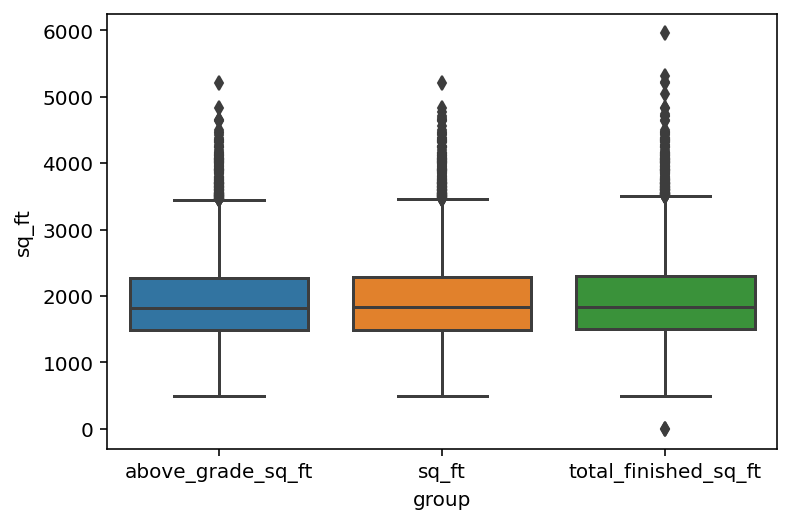

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

sq_ft = pd.concat([df.total_finished_sq_ft, df.sq_ft, df.above_grade_sq_ft], ignore_index=True).to_frame()

group = np.array(["total_finished_sq_ft","sq_ft","above_grade_sq_ft"])
group = np.repeat(group, 10919)
group = pd.DataFrame(group).astype('category')

all_sq_ft = pd.merge(sq_ft, group, left_index=True, right_index=True)
all_sq_ft = all_sq_ft.rename(columns={"0_x": "sq_ft", "0_y": "group"})
print(all_sq_ft.head())
print('\n')

model = ols('sq_ft ~ group', data = all_sq_ft).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
print('\n')

ax = sns.boxplot(x="group", y="sq_ft", data=all_sq_ft)

In [22]:
# Fix negative outlier from plot above
df.total_finished_sq_ft = df.total_finished_sq_ft.abs()

The hypothesis in question is Ho: mu_1 = mu_2 = mu_3, where mu_i represents the average square footage for the different labels. Since our p-value < 0.05, we reject Ho and conclude the square footage is the same (i.e. there is no difference between _total_finished_sq_ft_, _above_grade_sq_ft_, and _sq_ft_).

Let's keep _total_finished_sq_ft_.

In [23]:
df['total_finished_sq_ft_grouped'] = df.total_finished_sq_ft.apply(lambda x: '< 500' if x < 500 else 
                                                                            ('< 2500' if x < 2500 else '> 2500'))

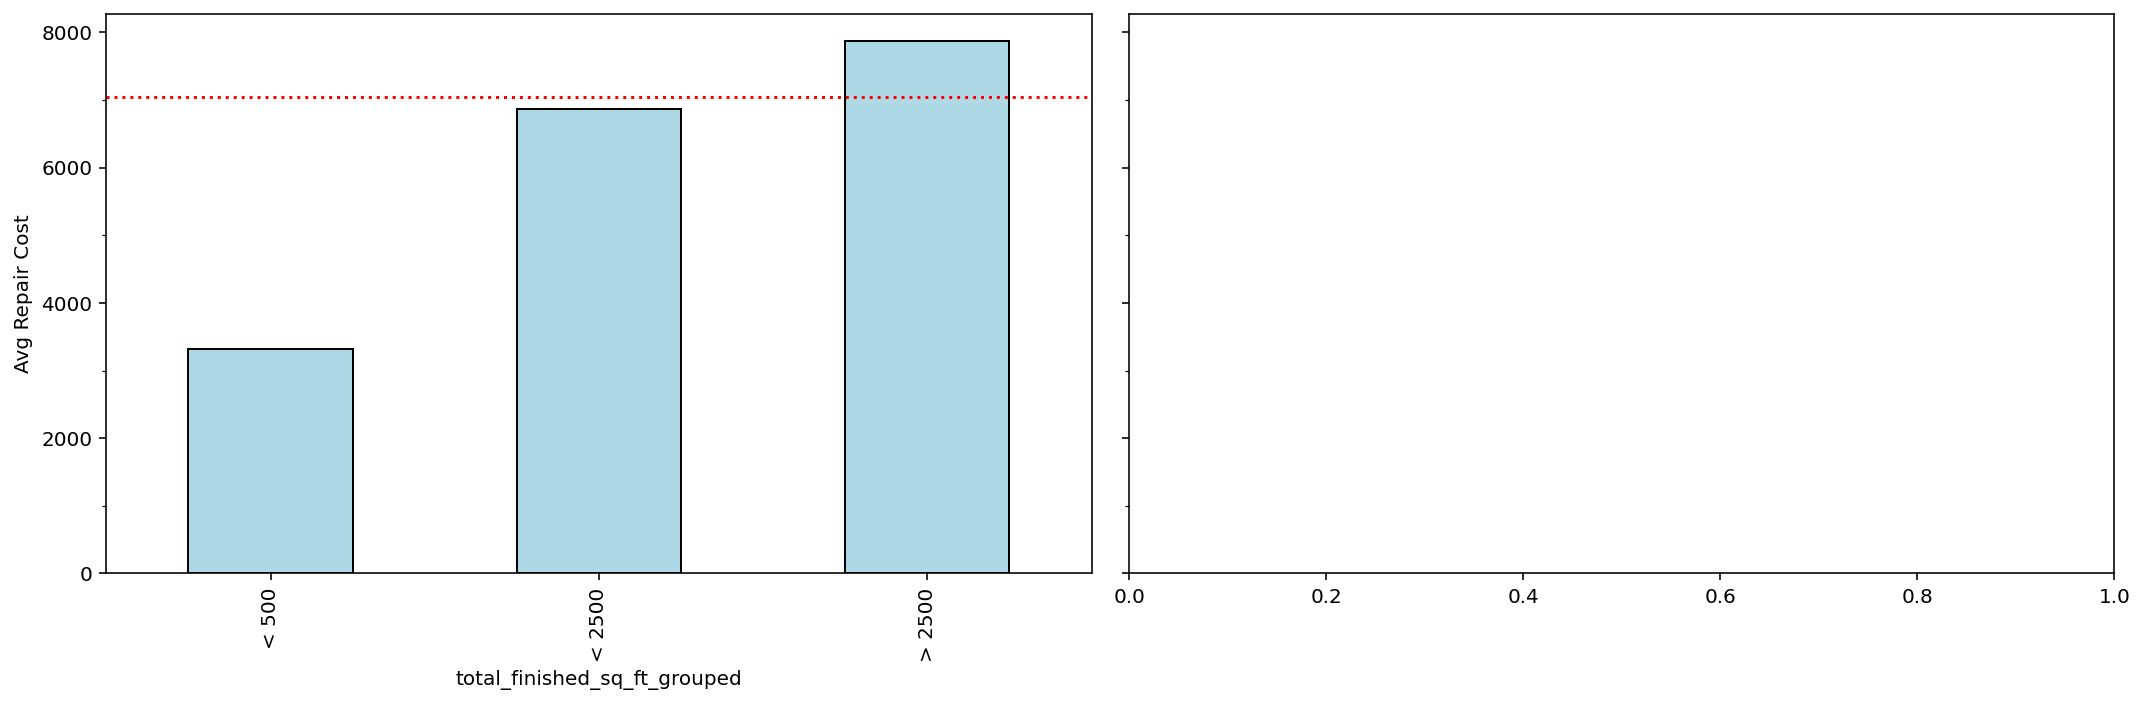

In [24]:
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)

for i in range(1):
    ax.ravel()[i].axhline(df.common_scope.mean(), color = 'r', ls = ':')
    ax.ravel()[i].set_ylabel('Avg Repair Cost')
    ax.ravel()[i].set_yticks(np.arange(0, 16000, 2000))

df.groupby('total_finished_sq_ft_grouped').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[0])

fig.tight_layout()

Let's switch our focus to the features pertaining to floor conditions and floor types.
- _floor_condition_
- _floor_type_
- _primary_floor_condition_
- _primary_floor_type_
- _secondary_floor_condition_
- _secondary_floor_type_

In [25]:
print(df.floor_condition.isna().sum())
print(df.floor_type.isna().sum())

10698
10697


Nearly all values in _floor_condition_ and _floor_type_ are NaN, so these features are not significant.

Let's look at the remaining floor condition and type features.
- _primary_floor_condition_
- _primary_floor_type_
- _secondary_floor_condition_
- _secondary_floor_type_

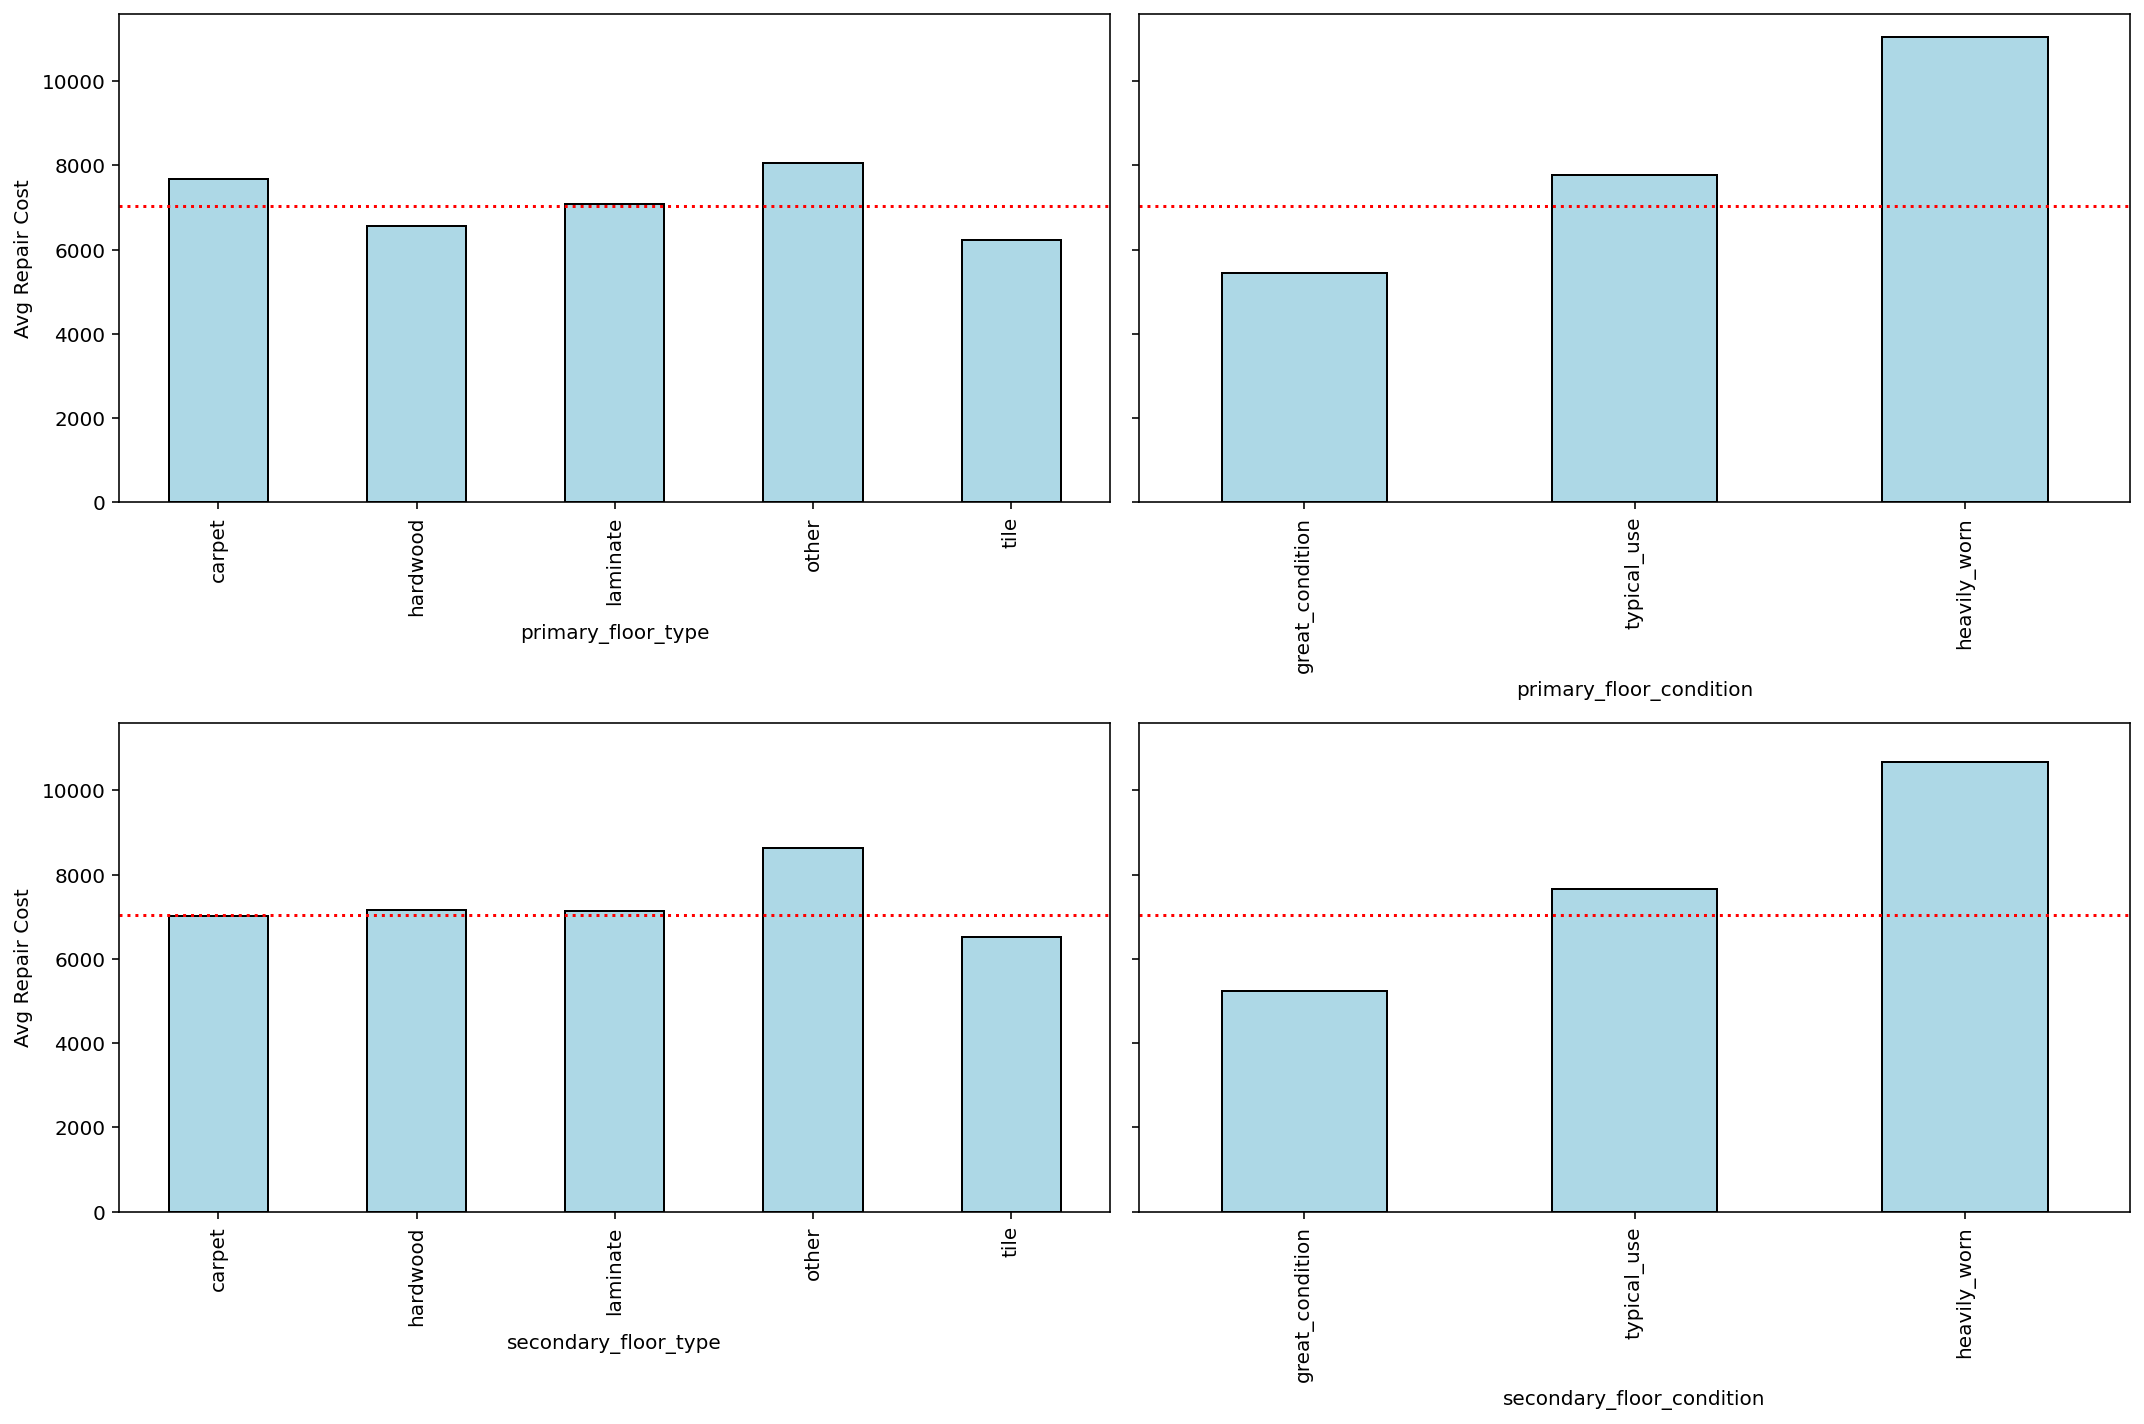

In [26]:
fig, ax = plt.subplots(2,2, figsize = (15,10), sharey = True)

for i in range(4):
    ax.ravel()[i].axhline(df.common_scope.mean(), color = 'r', ls = ':')
    ax.ravel()[i].set_ylabel('Avg Repair Cost')
    ax.ravel()[i].set_yticks(np.arange(0, 16000, 2000))

df.groupby('primary_floor_type').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[0])

df.groupby('primary_floor_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[1])

df.groupby('secondary_floor_type').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[2])

df.groupby('secondary_floor_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[3])

fig.tight_layout()

Both the _condition_ and _type_ look similar across the _primary_ and _secondary_ features. Let's run two-sided t-tests to see if their means are equal and therefore be consolidated.

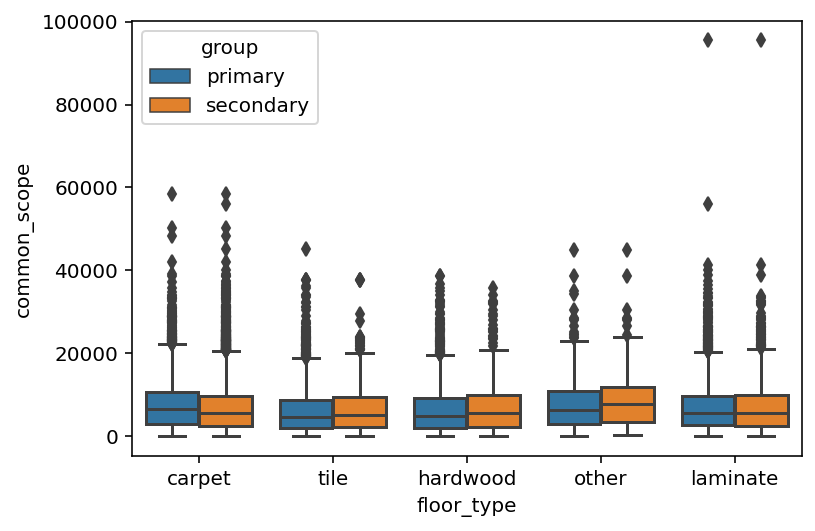

In [27]:
pft = df[['common_scope', 'primary_floor_type']].rename(columns={'primary_floor_type': 'floor_type'})
sft = df[['common_scope', 'secondary_floor_type']].rename(columns={'secondary_floor_type': 'floor_type'})

ft = pd.concat([pft, sft], ignore_index=True)

group = np.array(["primary","secondary"])
group = np.repeat(group, 10919)
group = pd.DataFrame(group).astype('category')

ft = pd.merge(ft, group, left_index=True, right_index=True)
ft = ft.rename(columns={0: "group"})

ax = sns.boxplot(x="floor_type", y="common_scope", hue="group", data=ft)

In [28]:
from scipy.stats import ttest_ind

## Ho: mu1 = mu2 vs. Ha: mu1 != mu2
print(ttest_ind(df.loc[df.primary_floor_type == 'carpet'].common_scope,
          df.loc[df.secondary_floor_type == 'carpet'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_type == 'hardwood'].common_scope,
          df.loc[df.secondary_floor_type == 'hardwood'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_type == 'laminate'].common_scope,
          df.loc[df.secondary_floor_type == 'laminate'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_type == 'other'].common_scope,
          df.loc[df.secondary_floor_type == 'other'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_type == 'tile'].common_scope,
          df.loc[df.secondary_floor_type == 'tile'].common_scope))

Ttest_indResult(statistic=5.416732969029934, pvalue=6.189476637857907e-08)
Ttest_indResult(statistic=-1.988652772940782, pvalue=0.046859690171376554)
Ttest_indResult(statistic=-0.2761193604123834, pvalue=0.7824702535516688)
Ttest_indResult(statistic=-0.9504156862946124, pvalue=0.34232004365594815)
Ttest_indResult(statistic=-1.2102728435851513, pvalue=0.22626487815077265)


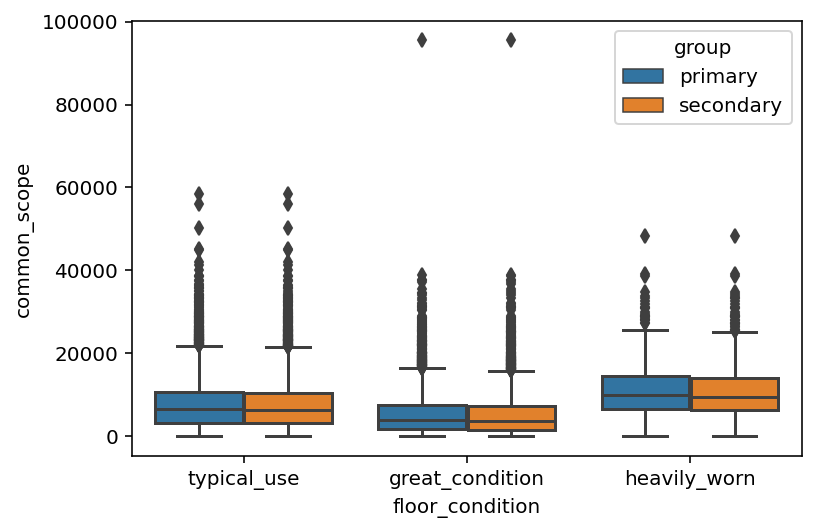

In [29]:
pfc = df[['common_scope', 'primary_floor_condition']].rename(columns={'primary_floor_condition': 'floor_condition'})
sfc = df[['common_scope', 'secondary_floor_condition']].rename(columns={'secondary_floor_condition': 'floor_condition'})

fc = pd.concat([pfc, sfc], ignore_index=True)

group = np.array(["primary","secondary"])
group = np.repeat(group, 10919)
group = pd.DataFrame(group).astype('category')

fc = pd.merge(fc, group, left_index=True, right_index=True)
fc = fc.rename(columns={0: "group"})

ax = sns.boxplot(x="floor_condition", y="common_scope", hue="group", data=fc)

In [30]:
from scipy.stats import ttest_ind

## Ho: mu1 = mu2 vs. Ha: mu1 != mu2
print(ttest_ind(df.loc[df.primary_floor_condition == 'great_condition'].common_scope,
          df.loc[df.secondary_floor_condition == 'great_condition'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_condition == 'heavily_worn'].common_scope,
          df.loc[df.secondary_floor_condition == 'heavily_worn'].common_scope))

print(ttest_ind(df.loc[df.primary_floor_condition == 'typical_use'].common_scope,
          df.loc[df.secondary_floor_condition == 'typical_use'].common_scope))

Ttest_indResult(statistic=1.814326369585105, pvalue=0.06966183974540599)
Ttest_indResult(statistic=1.2786069717452777, pvalue=0.20118835080518177)
Ttest_indResult(statistic=1.0993138890811822, pvalue=0.27165486886425455)


All but one p-value is larger than our threshold of 0.05. Considering this, we should not reject our hypothesis that the average of the means are the same.

In other words, the _primary_floor_type_ = _secondary_floor_type_ and _primary_floor_condition_ _secondary_floor_condition_. So we can remove _secondary_floor_condition_ and _secondary_floor_type_.

There are a few cases where _primary_floor_type_ <> _secondary_floor_type and _primary_floor_condition_ <> _secondary_floor_condition_ but by not consolidating the features, there's a high likelihood we overfit our model.

**Note:** Not doing so would lead to multicollinearity in our features. In other words, the more highly correlated the predictor variables are, the more difficult it is to determine how much variation in Y each separate predictor is responsible for. In estimating this partial effect there is imprecision so that the standard error becomes large.

Let's move onto _bathroom_ features to see if we can consolidate any features.

- _bathroom_condition_
- _bathrooms_full_
- _bathrooms_half_
- _bathrooms_
- _bathroom_feature_

In [31]:
print(df.bathrooms.isna().sum())
print(df.bathrooms.value_counts().head())

4848
2.0    2634
2.1    2106
3.0     615
3.1     252
2.5     164
Name: bathrooms, dtype: int64


It's appears that _bathrooms_ has too many NaN's and it's unique values are difficult to interpret, so it's best to not include it in the model.

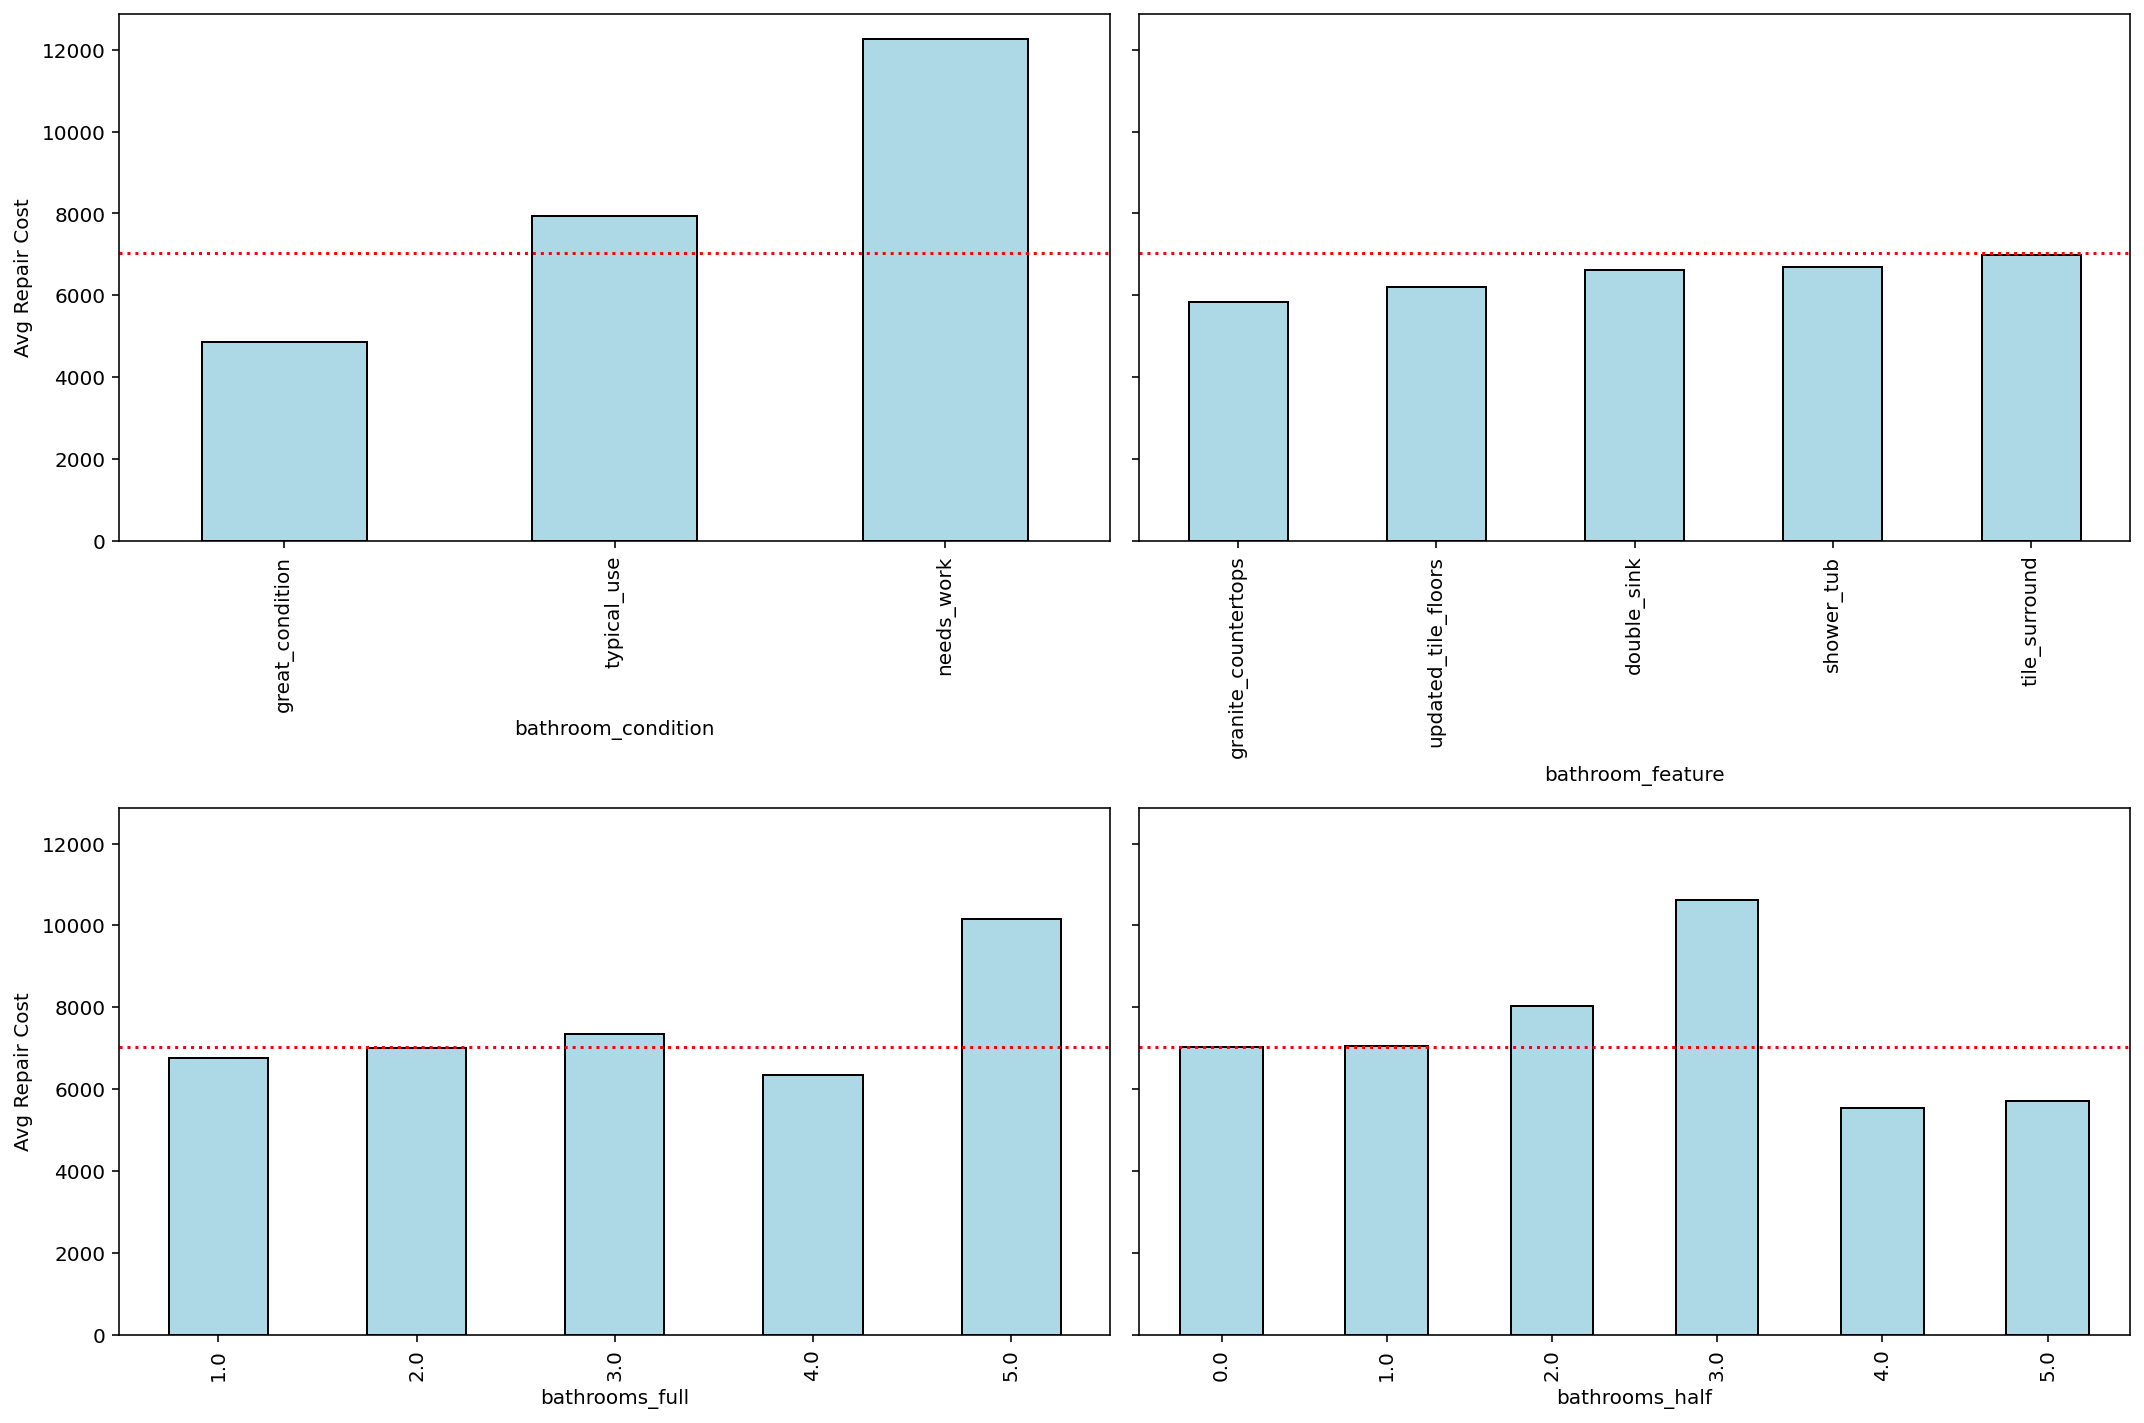

In [32]:
fig, ax = plt.subplots(2,2, figsize = (15,10), sharey = True)
fig.tight_layout()

for i in range(4):
    ax.ravel()[i].axhline(df.common_scope.mean(), color = 'r', ls = ':')
    ax.ravel()[i].set_ylabel('Avg Repair Cost')
    ax.ravel()[i].set_yticks(np.arange(0, 16000, 2000))  

df.groupby('bathroom_condition').common_scope.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[0])
bf_df.groupby('bathroom_feature').common_scope_mean.mean().sort_values(ascending = True).plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[1])
df.groupby('bathrooms_full').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[2])
df.groupby('bathrooms_half').common_scope.mean().plot(kind = 'bar', color = 'lightblue', edgecolor = 'k', ax = ax.ravel()[3])

fig.tight_layout()

Interestingly, there are 3 homes with 5 half bathrooms - that's impressive!

_bathrooms_full_ and _bathrooms_half_ should be kept as separate features. Consolidating them could lead to a "grey box". Is a home with 3 full baths === a home with 2 full baths and 2 half-baths?

Lastly, let's label encode and one-hot encode our categorical features.

First, let's consider categorical features that are ordinal.

- _back_yard_condition_
- _bathroom_condition_
- _kitchen_condition_
- _paint_condition_
- _primary_floor_condition_
- _hvac_age_
- _roof_age_

For these features, we assume they are ordinal. For example, a home where the _paint_condition_ is in great condition, renovations should be less. These are safe assumptions based on heuristics and the plots.

In [33]:
# from sklearn.preprocessing import OrdinalEncoder
# byc_enc = OrdinalEncoder(categories = ['no_yard', 'needs_work', 'partially_landscaped', 'full_landscaped'])
# df['back_yard_condition_enc'] = byc_enc.fit_transform(df[['back_yard_condition']])

df['back_yard_condition_enc'] = df.back_yard_condition.apply(lambda x: 0 if x == 'no_yard' else
                                                                      (1 if x == 'fully_landscaped' else
                                                                      (2 if x == 'partially_landscaped' else 3)))

df['bathroom_condition_enc'] = df.bathroom_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                    (1 if x == 'typical_use' else 2))

df['kitchen_condition_enc'] = df.kitchen_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                  (1 if x == 'typical_use' else 2))

df['paint_condition_enc'] = df.paint_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                              (1 if x == 'typical_use' else 2))

df['primary_floor_condition_enc'] = df.primary_floor_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                              (1 if x == 'typical_use' else 2))

df['hvac_age_enc'] = df.hvac_age.apply(lambda x: 0 if x == '0_to_7_years' else
                                                (1 if x == '8_to_15_years' else 2))

df['roof_age_enc'] = df.roof_age.apply(lambda x: 0 if x == '0_to_7_years' else
                                                (1 if x == '8_to_15_years' else 2))

Now, let's consider categorical features that are not ordinal.

- _kitchen_appliance_type_
- _kitchen_countertop_
- _primary_floor_type_
- _market_name_

In [34]:
cat_var = ['kitchen_appliance_type', 'kitchen_countertop', 'primary_floor_type', 'market_name']

df = pd.concat([df, pd.get_dummies(df[cat_var], drop_first = True)], axis = 1)

<!-- One last detail we should look at are the probability distributions of our numerical features. Some algo's like linear regression assume the variables have a Gaussian distribution, so we should do our best to stabilize the variance of the distribution.

- _common_scope_
- _age_
- _bathrooms_full_
- _bathrooms_half_
- _bedrooms_
- _exterior_stories_
- _f_days_since_prev_close_
- _garage_spaces_
- _renovation_amount_
- _total_finished_sq_ft_

Let's plot their respective historgrams. -->

Now that we have our features almost ready, let's check for multicollinearity using VIF.

In [35]:
features = ['age',
            'bathrooms_full',
            'bathrooms_half',
            'back_yard_condition_enc',
            'bathroom_condition_enc',
            'bedrooms',
            'exterior_stories',
            'f_days_since_prev_close',
            'garage_spaces',
            'has_kitchen_island',
            'has_new_cabinets',
            'has_tile_backsplash',
            'has_double_sink',
            'has_granite_countertops',
            'has_sep_shower_tub',
            'has_tile_surround',
            'has_updated_tile_floors',
            'has_addition',
            'has_foundation_issues',
            'has_solar_panels',
            'hvac_age_enc',
            'in_gated_community',
            'kitchen_appliance_type_mixed',
            'kitchen_appliance_type_other',
            'kitchen_appliance_type_stainless_steel',
            'kitchen_appliance_type_white',
            'kitchen_condition_enc',
            'kitchen_countertop_formica',
            'kitchen_countertop_granite',
            'kitchen_countertop_other',
            'kitchen_countertop_quartz',
            'market_name_atlantis',
            'market_name_kamar_taj',
            'market_name_latvaria',
            'market_name_metropolis',
            'market_name_themyscira',
            'market_name_valhalla',
            'market_name_wakanda',
            'market_name_zen_whoberi',
            'paint_condition_enc',
            'pool',
            'primary_floor_condition_enc',
            'primary_floor_type_hardwood',
            'primary_floor_type_laminate',
            'primary_floor_type_other',
            'primary_floor_type_tile',
            'renovation_amount',
            'roof_age_enc',
            'total_finished_sq_ft']

In [36]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df[features].columns 
  
# calculating VIF for each feature 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                          for i in range(len(df[features].columns))]
  
vif_data.sort_values(by='VIF', ascending=False).head(10)

,feature,VIF
5,bedrooms,45.173324
1,bathrooms_full,40.590441
48,total_finished_sq_ft,36.345550
6,exterior_stories,21.495806
8,garage_spaces,11.097133
0,age,7.507441
3,back_yard_condition_enc,6.261414
28,kitchen_countertop_granite,6.139908
27,kitchen_countertop_formica,5.420071
26,kitchen_condition_enc,4.856465


Let's update the feature set by dropping features with VIF > 10

- _bathrooms_full_
- _bedrooms_
- _exterior_stories_
- _garage_spaces_
- _total_finished_sq_ft_

In [37]:
high_vif = vif_data.feature[vif_data.VIF > 10]
features = [item for item in features if item not in high_vif.tolist()]

It's clear that we only have a handful of features that are moderately correlated (i.e. 0.5 - 0.7).

Let's remove some of the moderately correlated features.

In [38]:
c = df[features].corr().abs().unstack().sort_values()
c[c > 0.5].head(15)

has_double_sink               has_sep_shower_tub              0.509313
has_sep_shower_tub            has_double_sink                 0.509313
kitchen_condition_enc         bathroom_condition_enc          0.551930
bathroom_condition_enc        kitchen_condition_enc           0.551930
kitchen_countertop_formica    kitchen_countertop_granite      0.579935
kitchen_countertop_granite    kitchen_countertop_formica      0.579935
age                           age                             1.000000
primary_floor_type_tile       primary_floor_type_tile         1.000000
kitchen_appliance_type_mixed  kitchen_appliance_type_mixed    1.000000
in_gated_community            in_gated_community              1.000000
hvac_age_enc                  hvac_age_enc                    1.000000
has_solar_panels              has_solar_panels                1.000000
has_foundation_issues         has_foundation_issues           1.000000
has_addition                  has_addition                    1.000000
has_up

In [39]:
mc = ['kitchen_countertop_formica', 'bathroom_condition_enc', 'has_sep_shower_tub']
features = [item for item in features if item not in mc]

In [40]:
# fig, ax = plt.subplots(figsize=(10,10)) 
# sns.heatmap(df[features].corr())
# fig.tight_layout()

Before moving forward, we should check our continuous features and ensure they resemble a Gaussian distribution. If not, we consider transformations.

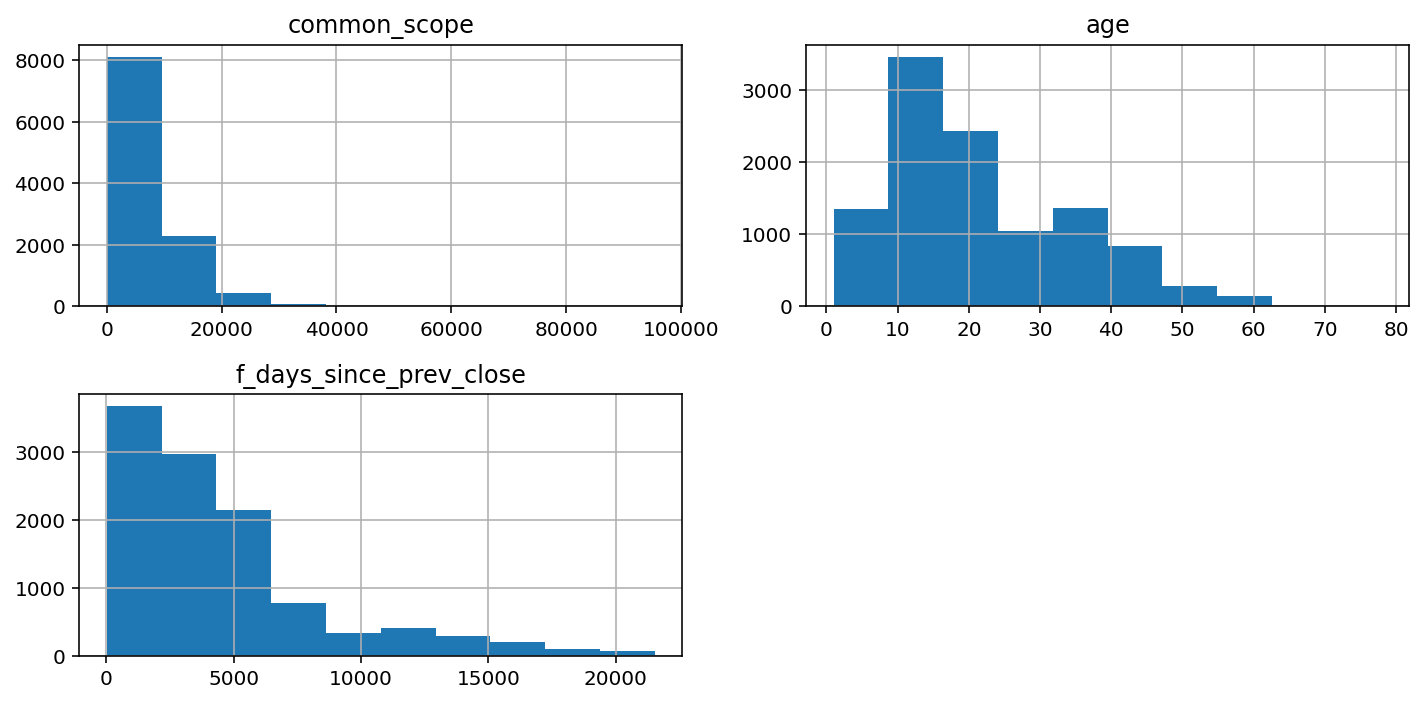

In [41]:
bc_features = ['common_scope',
               'age',
               'f_days_since_prev_close']

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df[bc_features].hist(ax = ax)
fig.tight_layout()

<!-- Notice the following features are skewed.

- _common_scope_
- _age_
- _f_days_since_prev_close_
- _total_finished_sq_ft_

Let's apply an auto power transformation using Box-Cox transform. -->

In [42]:
# Since Box-Cox can only be applied to positive values, change all 0's to 1's.
# df['common_scope'] = df.common_scope.apply(lambda x: 1 if x == 0 else x)
df['age'] = df.age.apply(lambda x: 1 if x == 0 else x)
df['f_days_since_prev_close'] = df.f_days_since_prev_close.apply(lambda x: 1 if x == 0 else x)

In [43]:
# Apply Box-Cox transformations
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
df['age'] = pt.fit_transform(df.age.to_frame())
df['f_days_since_prev_close'] = pt.fit_transform(df.f_days_since_prev_close.to_frame())

# pt_y = PowerTransformer(method='box-cox')
# df['common_scope'] = pt_y.fit_transform(df.common_scope.to_frame())

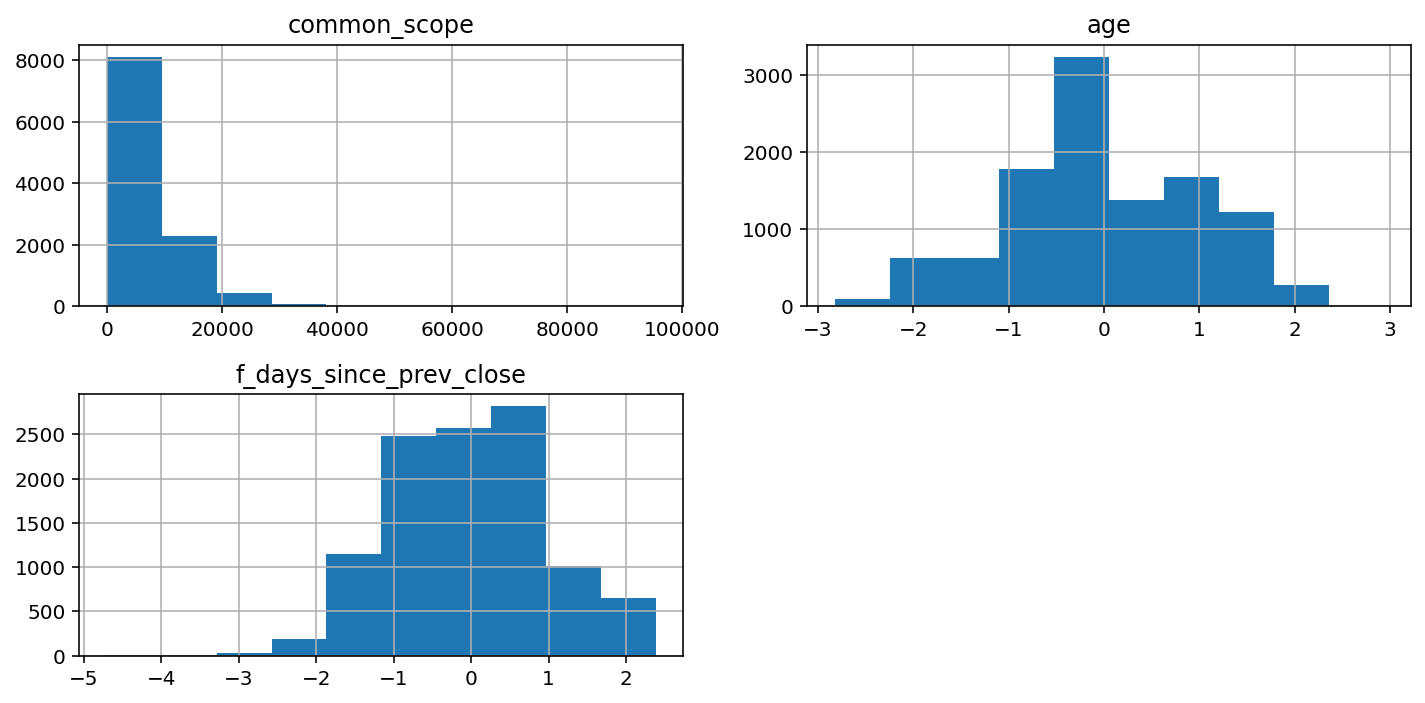

In [44]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df[bc_features].hist(ax = ax)
fig.tight_layout()

# Modeling

## LASSO Regression

To make the predictors more feasible we'll use a shrinkage method, LASSO regression. The penalty in LASSO can **exclude** useless variables and also does well when a small number of features are useful.

We use LassoCV since it not only fits the model but discovers the hyperparameters that give the best results using cross-validation.

In [45]:
from numpy import mean
from numpy import median
from numpy import std
from numpy import absolute
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso

X = df[features]
y = df.common_scope

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
# model_lasso = Lasso(alpha=1)
model_lasso = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# ratios = arange(0, 1, 0.01)
# alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# model_en = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)

# fit model
model_lasso.fit(X, y)
# model_en.fit(X, y)

# summarize chosen configuration
print('alpha: %f' % model_lasso.alpha_)
# print('alpha: %f' % model_en.alpha_)
# print('l1_ratio_: %f' % model_en.l1_ratio_)

# evaluate model
scores = cross_val_score(model_lasso, X, y, scoring='neg_median_absolute_error')
# scores = pt_y.inverse_transform(pd.DataFrame(scores))

# force scores to be positive
scores = absolute(scores)
print('Median MAE: %.3f (%.3f)' % (median(scores), std(scores)))

alpha: 0.920000
Median MAE: 3008.384 (173.049)


Not the greatest MAE, but with more time and help, I'm sure it can be improved.

<AxesSubplot:ylabel='Density'>

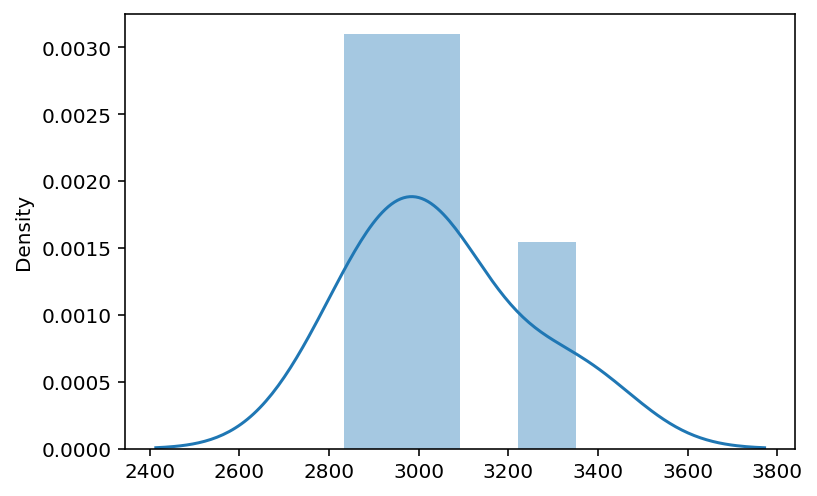

In [46]:
sns.distplot(scores)

# Prediction

In [47]:
test = pd.read_csv('holdout_candidate_df.csv')

In [48]:
print('Shape: {0}'.format(test.shape))

Shape: (1580, 39)


In [49]:
test.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,basement_unfinished_sq_ft,bathrooms_full,bathrooms_half,bedrooms,exterior_stories,garage_spaces,pool,renovation_amount,total_finished_sq_ft,basement_finished_sq_ft,sq_ft,above_grade_sq_ft,age,f_days_since_prev_close,bathrooms,pool_above_ground
count,549.000000,1573.000000,1566.000000,1579.000000,1561.000000,1578.000000,1580.000000,1580.000000,1580.000000,1573.000000,1574.000000,1580.000000,1580.000000,1580.000000,0.000000,0.000000
mean,77.637523,2.115702,0.462963,3.372388,1.555413,1.723701,0.110127,12594.936709,1921.825949,22.639542,1927.343710,1907.191772,21.995570,4423.716456,nan,nan
std,310.380461,0.456047,0.527428,0.737823,0.540333,0.756931,0.313147,194801.600504,641.401894,151.334418,632.093905,604.783245,12.998392,3901.926820,nan,nan
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,658.000000,658.000000,1.000000,27.000000,nan,nan
25%,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1465.750000,0.000000,1470.250000,1464.000000,13.000000,1662.250000,nan,nan
50%,0.000000,2.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1800.000000,0.000000,1804.500000,1796.500000,18.000000,3320.000000,nan,nan
75%,0.000000,2.000000,1.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2276.750000,0.000000,2272.250000,2262.250000,31.000000,5700.500000,nan,nan
max,2336.000000,5.000000,5.000000,6.000000,3.000000,4.000000,1.000000,5000000.000000,5635.000000,1826.000000,5635.000000,5635.000000,59.000000,21535.000000,nan,nan


In [50]:
test.head()

,flip_token,back_yard_condition,basement_unfinished_sq_ft,bathroom_condition,bathroom_features,bathrooms_full,bathrooms_half,bedrooms,eligibility_features,exterior_stories,floor_condition,floor_type,front_yard_condition,garage_spaces,has_renovation,kitchen_appliance_type,kitchen_condition,kitchen_countertop,kitchen_features,paint_condition,pool,primary_floor_condition,primary_floor_type,renovation_amount,secondary_floor_condition,secondary_floor_type,total_finished_sq_ft,basement_finished_sq_ft,sq_ft,valuation_date,above_grade_sq_ft,age,f_days_since_prev_close,market_name,bathrooms,pool_above_ground,hvac_age,roof_age,in_gated_community
0,560EQGK7A1YM,needs_work,NaN,great_condition,"['double_sink', 'separate_shower_tub']",3.0,0.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,3.0,False,stainless_steel,typical_use,other,"['kitchen_island', 'stainless_steel_appliances']",typical_use,1.0,typical_use,tile,0,great_condition,carpet,3484.0,0.0,3484.0,2027-07-12 23:58:03.423266,3484.0,12.0,3045.0,asgard,NaN,NaN,0_to_7_years,8_to_15_years,False
1,N283R19X7QWF,fully_landscaped,NaN,typical_use,['double_sink'],2.0,1.0,3.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,black,typical_use,formica,['_none_'],typical_use,0.0,heavily_worn,carpet,0,heavily_worn,carpet,2036.0,0.0,2036.0,2027-07-12 23:54:01.129302,2036.0,22.0,5922.0,asgard,NaN,NaN,16_plus_years,16_plus_years,True
2,7HNA53BSS2D92,fully_landscaped,NaN,typical_use,"['double_sink', 'updated_tile_floors']",2.0,1.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,black,typical_use,other,"['kitchen_island', 'tile_backsplash']",typical_use,0.0,typical_use,laminate,0,typical_use,carpet,1711.0,0.0,1711.0,2027-07-12 23:30:28.012152,1711.0,10.0,3825.0,asgard,NaN,NaN,8_to_15_years,8_to_15_years,False
3,NN5R58HDGFB2,fully_landscaped,NaN,great_condition,['updated_tile_floors'],2.0,0.0,3.0,['_none_'],1.0,NaN,NaN,fully_landscaped,2.0,False,mixed,great_condition,corian,['_none_'],great_condition,0.0,great_condition,carpet,0,great_condition,carpet,1691.0,0.0,1691.0,2027-07-12 23:30:18.427798,1691.0,15.0,4274.0,asgard,NaN,NaN,0_to_7_years,8_to_15_years,False
4,2XDMCE3HDXNNP,needs_work,NaN,typical_use,"['double_sink', 'granite_countertops', 'separate_shower_tub']",3.0,0.0,5.0,[],2.0,NaN,NaN,fully_landscaped,3.0,False,stainless_steel,typical_use,granite_slab,['stainless_steel_appliances'],typical_use,1.0,typical_use,carpet,0,typical_use,carpet,2715.0,0.0,2861.0,2027-07-12 22:55:50.915363,2715.0,36.0,3456.0,asgard,NaN,NaN,NaN,NaN,False


In [51]:
# Fix NaN
test.age = test.age.fillna(df.age.mean())
test.back_yard_condition = test.back_yard_condition.fillna("no_yard")
test.bathroom_features = test.bathroom_features.fillna('0')
test.bathrooms_half = test.bathrooms_half.fillna(df.bathrooms_half.mean())
test.eligibility_features = test.eligibility_features.fillna('0')
test.f_days_since_prev_close = test.f_days_since_prev_close.fillna(df.f_days_since_prev_close.mean())
test.hvac_age = test.hvac_age.fillna("8_to_15_years")
test.kitchen_appliance_type = test.kitchen_appliance_type.fillna("other")
test.kitchen_condition = test.kitchen_condition.fillna("typical_condition")
test.kitchen_countertop = test.kitchen_countertop.fillna("other")
test.kitchen_features = test.kitchen_features.fillna('0')
test.paint_condition = test.paint_condition.fillna("typical_use")
test.pool = test.pool.fillna(0)
test.primary_floor_condition = test.primary_floor_condition.fillna("typical_use")
test.primary_floor_type = test.primary_floor_type.fillna("other")
test.roof_age = test.roof_age.fillna("8_to_15_years")

# Fix labels
test['in_gated_community'] = test.in_gated_community.apply(lambda x: 1 if x == True else 0)

test['hvac_age'] = test.hvac_age.apply(lambda x: '8_to_15_years' if x == 'not_sure' else x)
test['roof_age'] = test.roof_age.apply(lambda x: '8_to_15_years' if x == 'not_sure' else x)

test['kitchen_condition'] = test.kitchen_condition.apply(lambda x: 'typical_condition' if x == "typical_use" else x)
test['kitchen_countertop'] = test.kitchen_countertop.apply(lambda x: 'granite' if 'granite' in x else ('granite' if x == 'solid_stone_slab' else ('other' if 'other' in x else x)))

# Kitchen features
test['has_new_cabinets'] = 0
test['has_tile_backsplash'] = 0
test['has_kitchen_island'] = 0

for row in range(len(test)):
    if 'new_cabinets' in test.loc[row, 'kitchen_features']:
        test.loc[row, 'has_new_cabinets'] = 1
    if 'tile_backsplash' in df.loc[row, 'kitchen_features']:
        test.loc[row, 'has_tile_backsplash'] = 1
    if 'kitchen_island' in df.loc[row, 'kitchen_features']:
        test.loc[row, 'has_kitchen_island'] = 1
        
# Bathroom features
test['has_double_sink'] = 0
test['has_granite_countertops'] = 0
test['has_tile_surround'] = 0
test['has_updated_tile_floors'] = 0

for row in range(len(test)):
    if 'double_sink' in test.loc[row, 'bathroom_features']:
        test.loc[row, 'has_double_sink'] = 1
    if 'granite_countertops' in test.loc[row, 'bathroom_features']:
        test.loc[row, 'has_granite_countertops'] = 1
    if 'tile_surround' in test.loc[row, 'bathroom_features']:
        test.loc[row, 'has_tile_surround'] = 1
    if 'updated_tile_floors' in test.loc[row, 'bathroom_features']:
        test.loc[row, 'has_updated_tile_floors'] = 1

# Eligibility features
test['has_solar_panels'] = 0
test['has_addition'] = 0
test['has_foundation_issues'] = 0

for row in range(len(test)):
    if 'solar' in test.loc[row, 'eligibility_features']:
        test.loc[row, 'has_solar_panels'] = 1
    if 'addition' in test.loc[row, 'eligibility_features']:
        test.loc[row, 'has_addition'] = 1
    if 'foundation' in test.loc[row, 'eligibility_features']:
        test.loc[row, 'has_foundation_issues'] = 1
        
# Ordinal categorical features
test['back_yard_condition_enc'] = test.back_yard_condition.apply(lambda x: 0 if x == 'no_yard' else
                                                                          (1 if x == 'fully_landscaped' else
                                                                          (2 if x == 'partially_landscaped' else 3)))

test['bathroom_condition_enc'] = test.bathroom_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                        (1 if x == 'typical_use' else 2))

test['kitchen_condition_enc'] = test.kitchen_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                      (1 if x == 'typical_use' else 2))

test['paint_condition_enc'] = test.paint_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                  (1 if x == 'typical_use' else 2))

test['primary_floor_condition_enc'] = test.primary_floor_condition.apply(lambda x: 0 if x == 'great_condition' else
                                                                                  (1 if x == 'typical_use' else 2))

test['hvac_age_enc'] = test.hvac_age.apply(lambda x: 0 if x == '0_to_7_years' else
                                                    (1 if x == '8_to_15_years' else 2))

test['roof_age_enc'] = test.roof_age.apply(lambda x: 0 if x == '0_to_7_years' else
                                                    (1 if x == '8_to_15_years' else 2))
        
# Non-ordinal categorical features
cat_var = ['kitchen_appliance_type', 'kitchen_countertop', 'primary_floor_type', 'market_name']
test = pd.concat([test, pd.get_dummies(test[cat_var], drop_first = True)], axis = 1)

# Box-Cox transformations
test['age'] = test.age.apply(lambda x: 1 if x == 0 else x)
test['f_days_since_prev_close'] = test.f_days_since_prev_close.apply(lambda x: 1 if x == 0 else x)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
test['age'] = pt.fit_transform(test.age.to_frame())
test['f_days_since_prev_close'] = pt.fit_transform(test.f_days_since_prev_close.to_frame())

In [52]:
flip_token = test.flip_token
test = test[features]

In [67]:
y_pred = model_lasso.predict(test)
# y_pred = pt_y.inverse_transform(pd.DataFrame(y_pred)).tolist()

In [68]:
predictions = pd.DataFrame({'flip_token': flip_token, 'prediction': y_pred})
predictions.head()

,flip_token,prediction
0,560EQGK7A1YM,10078.509415
1,N283R19X7QWF,7684.948854
2,7HNA53BSS2D92,4996.703849
3,NN5R58HDGFB2,1223.946490
4,2XDMCE3HDXNNP,12491.318658


In [69]:
predictions.to_csv(r'/Users/patchong/Google Drive/Work/Prep/Challenges/Opendoor/predictions.csv')

In [70]:
y_pred.mean()

6988.173434236108

In [71]:
df.common_scope.mean()

7042.446612327127

In [72]:
predictions.shape

(1580, 2)

In [53]:
df.head()

,flip_token,back_yard_condition,basement_unfinished_sq_ft,bathroom_condition,bathroom_features,bathrooms_full,bathrooms_half,bedrooms,eligibility_features,exterior_stories,floor_condition,floor_type,front_yard_condition,garage_spaces,has_renovation,kitchen_appliance_type,kitchen_condition,kitchen_countertop,kitchen_features,paint_condition,pool,primary_floor_condition,primary_floor_type,renovation_amount,secondary_floor_condition,secondary_floor_type,total_finished_sq_ft,basement_finished_sq_ft,sq_ft,valuation_date,above_grade_sq_ft,age,f_days_since_prev_close,market_name,bathrooms,pool_above_ground,hvac_age,roof_age,in_gated_community,common_scope,age_grouped,f_days_since_prev_close_grouped,has_new_cabinets,has_tile_backsplash,has_kitchen_island,has_double_sink,has_sep_shower_tub,has_granite_countertops,has_tile_surround,has_updated_tile_floors,has_solar_panels,has_addition,has_foundation_issues,total_finished_sq_ft_grouped,back_yard_condition_enc,bathroom_condition_enc,kitchen_condition_enc,paint_condition_enc,primary_floor_condition_enc,hvac_age_enc,roof_age_enc,kitchen_appliance_type_mixed,kitchen_appliance_type_other,kitchen_appliance_type_stainless_steel,kitchen_appliance_type_white,kitchen_countertop_formica,kitchen_countertop_granite,kitchen_countertop_other,kitchen_countertop_quartz,primary_floor_type_hardwood,primary_floor_type_laminate,primary_floor_type_other,primary_floor_type_tile,market_name_atlantis,market_name_kamar_taj,market_name_latvaria,market_name_metropolis,market_name_themyscira,market_name_valhalla,market_name_wakanda,market_name_zen_whoberi
0,Z9FJAA5RXGXC,partially_landscaped,0.0,great_condition,"['double_sink', 'separate_shower_tub']",2.0,1.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,black,typical_condition,formica,"['kitchen_island', 'tile_backsplash']",typical_use,0.0,typical_use,carpet,0,typical_use,carpet,2277.0,0.0,2290.0,2027-05-31 23:35:49.295526,2277.0,-0.695565,0.334436,atlantis,NaN,NaN,8_to_15_years,8_to_15_years,0,3554.43,< 20,< 25yr,0,1,1,1,1,0,0,0,0,0,0,< 2500,2,0,2,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7W5Y1WKECD261,fully_landscaped,NaN,great_condition,"['granite_countertops', 'tile_surround', 'updated_tile_floors']",2.0,0.0,3.0,['_none_'],1.0,NaN,NaN,fully_landscaped,2.0,False,black,great_condition,granite,"['kitchen_island', 'new_cabinets', 'tile_backsplash']",great_condition,0.0,great_condition,tile,0,great_condition,carpet,1411.0,0.0,1411.0,2027-05-31 23:25:03.321129,1411.0,2.214606,2.386189,asgard,NaN,NaN,0_to_7_years,8_to_15_years,0,8841.98,< 60,>= 50yr,1,1,1,0,0,1,1,1,0,0,0,< 2500,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,54G38FDCPNMFT,needs_work,NaN,typical_use,"['double_sink', 'separate_shower_tub']",2.0,0.0,3.0,['_none_'],1.0,NaN,NaN,fully_landscaped,2.0,False,stainless_steel,great_condition,granite,"['_none_', 'stainless_steel_appliances']",great_condition,0.0,great_condition,carpet,0,great_condition,carpet,1916.0,0.0,1916.0,2027-05-31 22:00:11.689445,1916.0,-0.291899,-2.038535,asgard,NaN,NaN,16_plus_years,16_plus_years,0,1086.30,< 20,< 5yr,0,0,0,1,1,0,0,0,0,0,0,< 2500,3,1,0,0,0,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4Q7NJTMZDVH0M,fully_landscaped,NaN,typical_use,"['double_sink', 'separate_shower_tub', 'tile_surround', 'updated_tile_floors']",2.0,1.0,4.0,['_none_'],2.0,NaN,NaN,fully_landscaped,2.0,False,mixed,typical_condition,formica,['tile_backsplash'],typical_use,0.0,typical_use,tile,0,typical_use,carpet,2900.0,0.0,2900.0,2027-05-31 21:08:41.147442,2900.0,0.053226,0.536862,kamar_taj,NaN,NaN,16_plus_years,16_plus_years,0,1934.75,< 30,< 25yr,0,1,0,1,1,0,1,1,0,0,0,> 2500,1,1,2,1,1,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,KZV20HJ3VCPP,partially_landscaped,NaN,typical_use,"['double_sink', 'granite_countertops', 'updated_tile_floors']",2.0,0.0,4.0,['_none_'],1.0,NaN,NaN,fully_landscaped,0.0,False,stainless_steel,typical_condition,granite,"['kitchen_island', 'stainless_steel_appliances', 'tile_backsplash']",typical_use,0.0,great_c